# Linear Regression with Insurance Data

In [1]:
## Loading the libraries
import numpy as np
import pandas as pd

In [101]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
## Viewing some sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
df_orig = df.copy(deep=True)

## EDA

#### Statistical information

In [5]:
## Viewing some statistical Information
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.describe()  ## Numerical Columns Statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
## Missing values Checking
miss_values = df.isnull().sum()
miss_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is not any missing values in the given data.

## Visualization

## Uni-variate Analysis

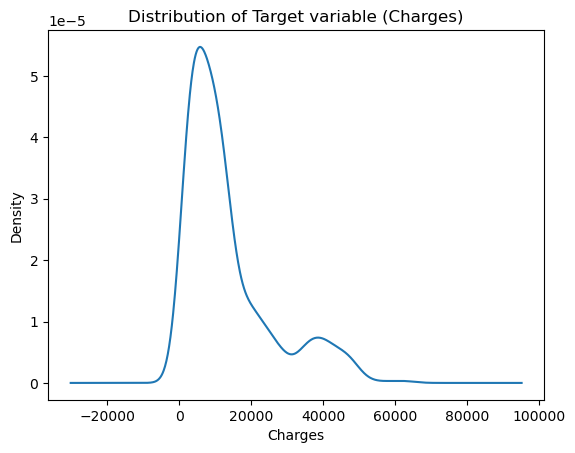

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
## Checking the target variable distribution
df.charges.plot.density()
plt.title("Distribution of Target variable (Charges)")
plt.xlabel('Charges')
plt.show()

In [9]:
df.charges.skew()  ## Checking the skewness of target variable

1.5158796580240388

From the above plot, we can observe that the target variable charges is not normally distributed. It's right skewed.

In [10]:
## Value count of sex column
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
round(df.sex.value_counts(normalize=True) * 100,2)

male      50.52
female    49.48
Name: sex, dtype: float64

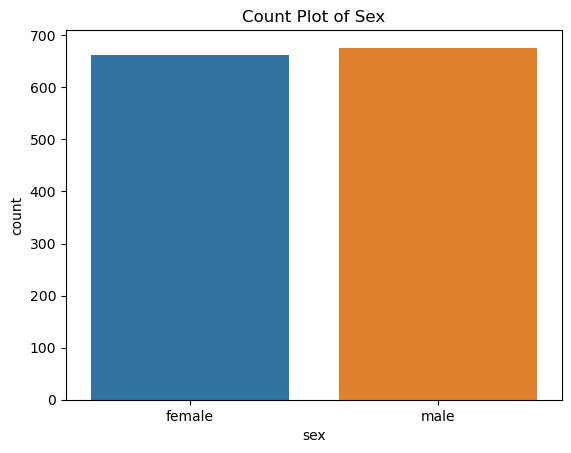

In [12]:
## Visualizaing Sex column
sns.countplot(x = 'sex', data=df)
plt.title("Count Plot of Sex")
plt.show()

From the above plot, we can observe that both categories are equally distributed.

In [13]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

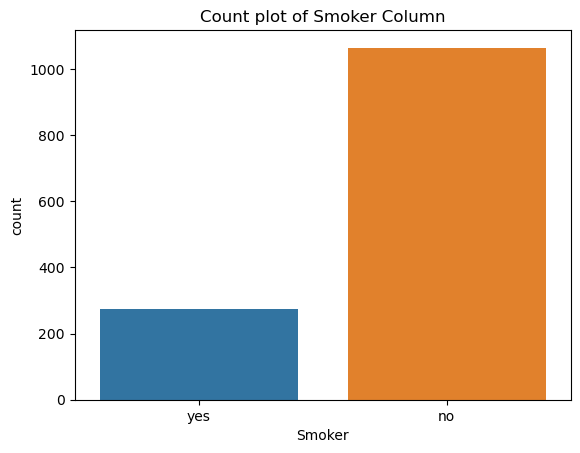

In [14]:
## Smoker Column
sns.countplot(x='smoker', data=df)
plt.title('Count plot of Smoker Column')
plt.xlabel('Smoker')
plt.show()

We can observe that there less number of smokers compared to non-smokers.

In [15]:
## Distribution of Region 
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

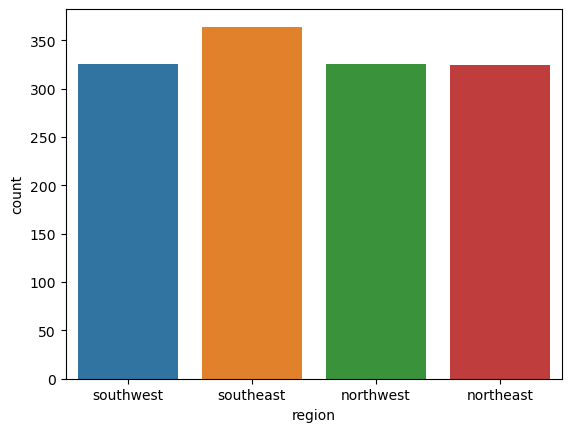

In [16]:
sns.countplot(x='region', data = df)
plt.show()

We can observe that Southeast region is slightly higher count than other regions.

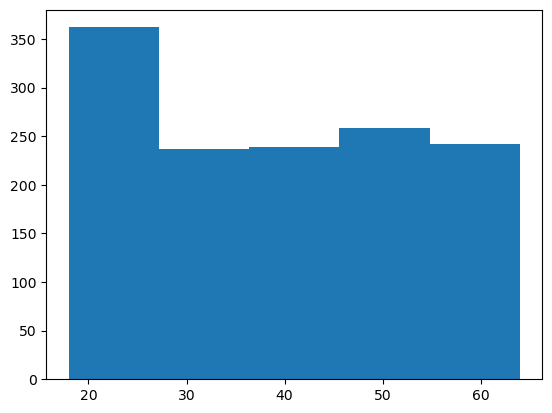

In [17]:
## Analysing the Age distribution

plt.hist(df.age, bins=5)
plt.show()

In [18]:
df.age.min(), df.age.max()

(18, 64)

In [19]:
## Let us create a age group based on the above plot
df['agegrp'] = pd.cut(df['age'], bins=[17, 30, 40,50,65], labels=['young','middle','uppermiddle','old'])


In [20]:
df.groupby('agegrp')['age'].agg([min, max])

,min,max
agegrp,,
young,18,30
middle,31,40
uppermiddle,41,50
old,51,64


In [21]:
df.agegrp.value_counts()

young          444
old            356
uppermiddle    281
middle         257
Name: agegrp, dtype: int64

In [22]:
df.groupby(['agegrp','smoker'])['charges'].agg([min,max,np.mean])

min          max          mean
agegrp      smoker                                       
young       no       1121.8739  27724.28875   4462.308505
            yes     12829.4551  51194.55914  27528.078343
middle      no       3260.1990  28476.73499   6631.046417
            yes     15820.6990  58571.07448  30466.664836
uppermiddle no       5699.8375  32108.66282   9622.055472
            yes     18767.7377  62592.87309  33391.834441
old         no       8782.4690  36910.60803  13540.277993
            yes     21195.8180  63770.42801  38820.223082

In [23]:
## Binning BMI
df.bmi.min(), df.bmi.max()

(15.96, 53.13)

In [24]:
df['bmigrp'] = pd.cut(df['bmi'], bins=[15, 20,25,35,54], labels=['low','normal','overweight','obese'])


In [25]:
df.bmigrp.value_counts()

overweight    775
obese         316
normal        206
low            41
Name: bmigrp, dtype: int64

In [26]:
df.groupby(['bmigrp','smoker'])['charges'].agg([min,max,np.mean])

min          max          mean
bmigrp     smoker                                        
low        no       1241.56500  21595.38229   6129.459628
           yes     12829.45510  32734.18630  18470.922050
normal     no       1121.87390  30166.61817   7830.728882
           yes     13747.87235  35069.37452  20107.000185
overweight no       1131.50660  36910.60803   8389.311849
           yes     15518.18025  62592.87309  31068.233528
obese      no       1141.44510  33471.97189   9244.504533
           yes     35585.57600  63770.42801  43556.403559

## Bivariate Analysis

Now, we will be checking the target variable with respect to each and every independent variable

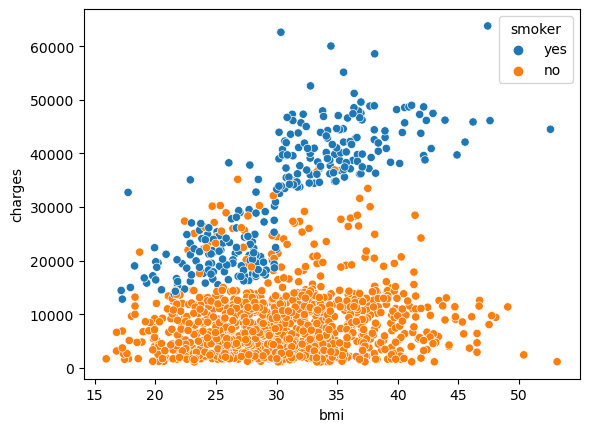

In [27]:
## Checking the charges vs BMI
sns.scatterplot(x='bmi',y='charges', hue='smoker', data=df)
plt.show()

In [28]:
df.groupby('smoker')['charges'].agg([min, max, np.mean])

,min,max,mean
smoker,,,
no,1121.8739,36910.60803,8434.268298
yes,12829.4551,63770.42801,32050.231832


We can observe that the insurance premium is very high for smokers when compared to non-smokers.  BMI is not differentiating the premium charges much.

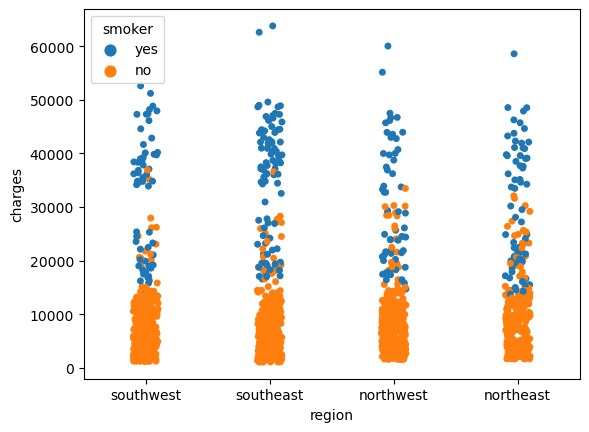

In [29]:
## Analysing regionwise charges
sns.stripplot(y='charges', x='region', hue='smoker', data=df)
plt.show()

In [30]:
df.groupby(['region','smoker'])['charges'].agg([min, max, np.mean])

min          max          mean
region    smoker                                       
northeast no       1694.7964  32108.66282   9165.531672
          yes     12829.4551  58571.07448  29673.536473
northwest no       1621.3402  33471.97189   8556.463715
          yes     14711.7438  60021.39897  30192.003182
southeast no       1121.8739  36580.28216   8032.216309
          yes     16577.7795  63770.42801  34844.996824
southwest no       1241.5650  36910.60803   8019.284513
          yes     13844.5060  52590.82939  32269.063494

From the above data we can observe the follwoing:
    
* Southeast region is charging more premium compared to other regions for smokers.
* Average premium for non-smokers is higher in Northeast region when compared with other regions.


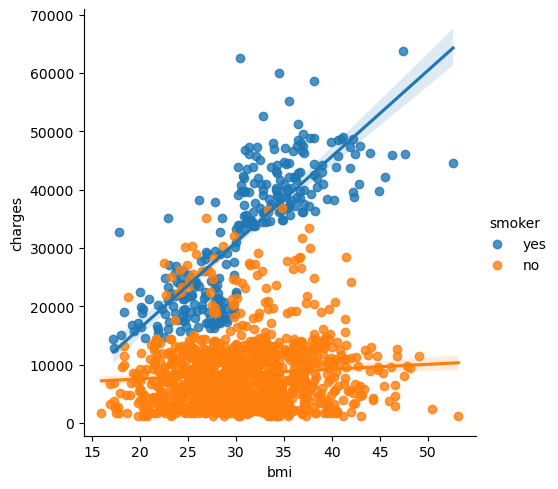

In [31]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.show()

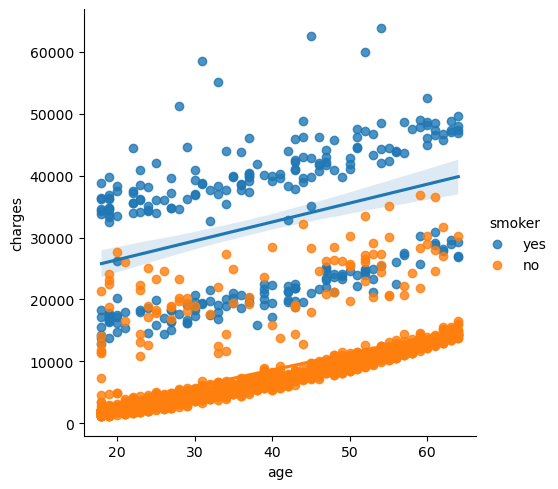

In [32]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.show()

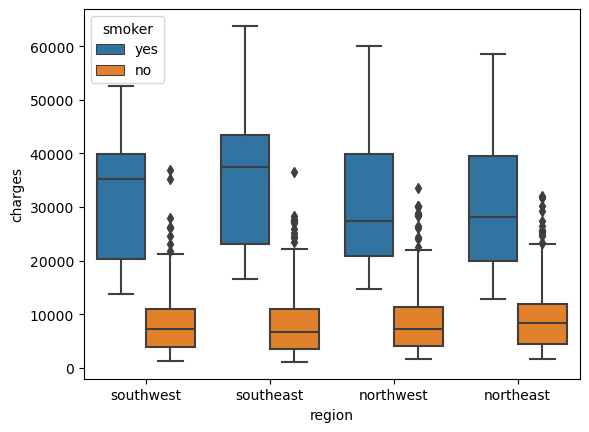

In [33]:
sns.boxplot(y='charges', x='region', hue='smoker', data=df)
plt.show()

In [34]:
df1 = df.copy(deep = True)  ## Taking a backup 

In [35]:
## Let us drop the unwanted variables from the dataframe
df.drop(['age','bmi'], axis=1, inplace=True)

In [36]:
df.head()

,sex,children,smoker,region,charges,agegrp,bmigrp
0,female,0,yes,southwest,16884.92400,young,overweight
1,male,1,no,southeast,1725.55230,young,overweight
2,male,3,no,southeast,4449.46200,young,overweight
3,male,0,no,northwest,21984.47061,middle,normal
4,male,0,no,northwest,3866.85520,middle,overweight


In [37]:
df = pd.get_dummies(df, drop_first = True)

In [38]:
df.head()

,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,agegrp_middle,agegrp_uppermiddle,agegrp_old,bmigrp_normal,bmigrp_overweight,bmigrp_obese
0,0,16884.92400,0,1,0,0,1,0,0,0,0,1,0
1,1,1725.55230,1,0,0,1,0,0,0,0,0,1,0
2,3,4449.46200,1,0,0,1,0,0,0,0,0,1,0
3,0,21984.47061,1,0,1,0,0,1,0,0,1,0,0
4,0,3866.85520,1,0,1,0,0,1,0,0,0,1,0


### Checking for correlation

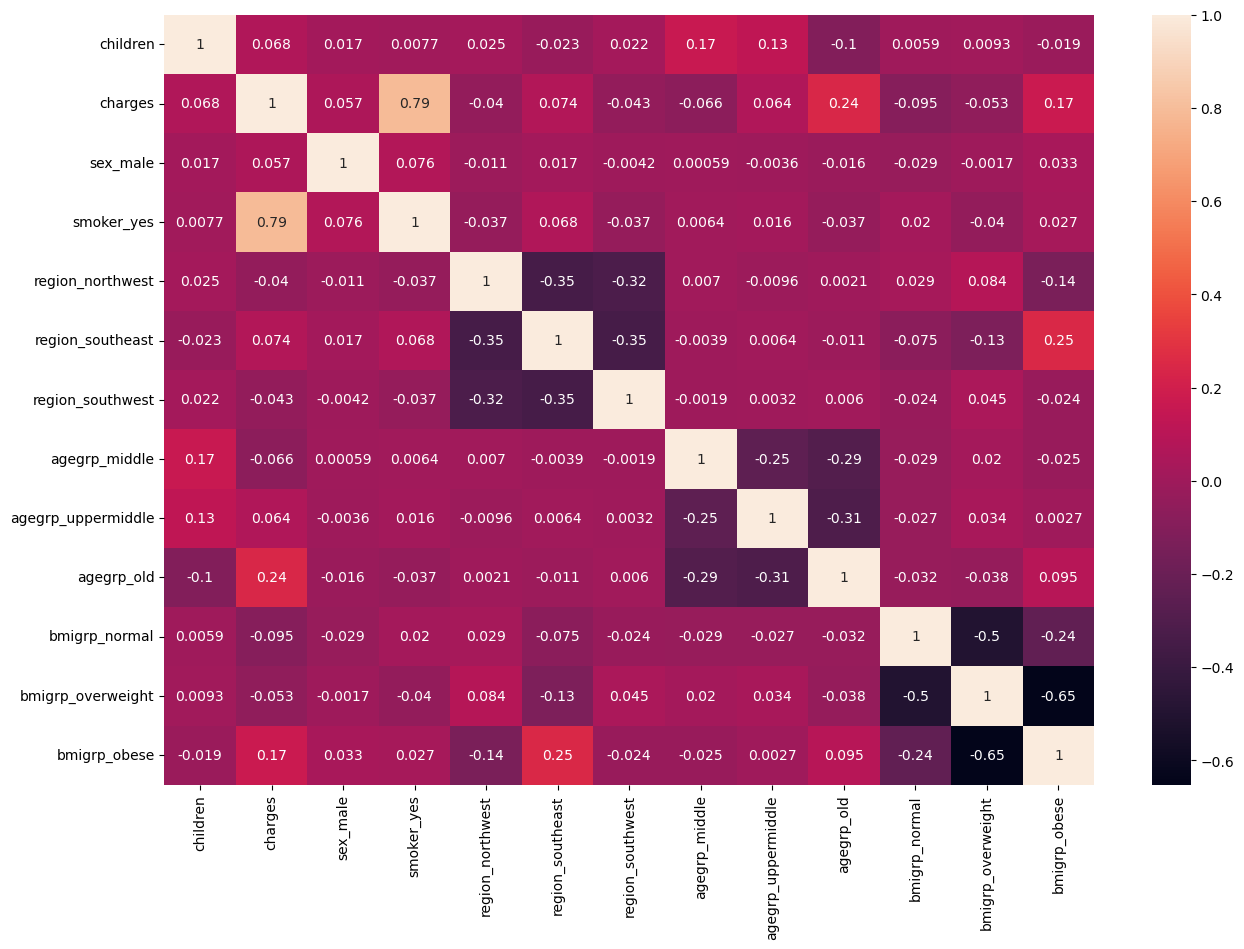

In [39]:
## Correlation matrix
df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [40]:
correlation = np.triu(np.ones_like(df.corr()))
print(correlation.shape)
print(type(correlation))

(13, 13)
<class 'numpy.ndarray'>


In [41]:
x = np.array(list(range(9))).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
print(np.ones_like(x))

[[1 1 1]
 [1 1 1]
 [1 1 1]]


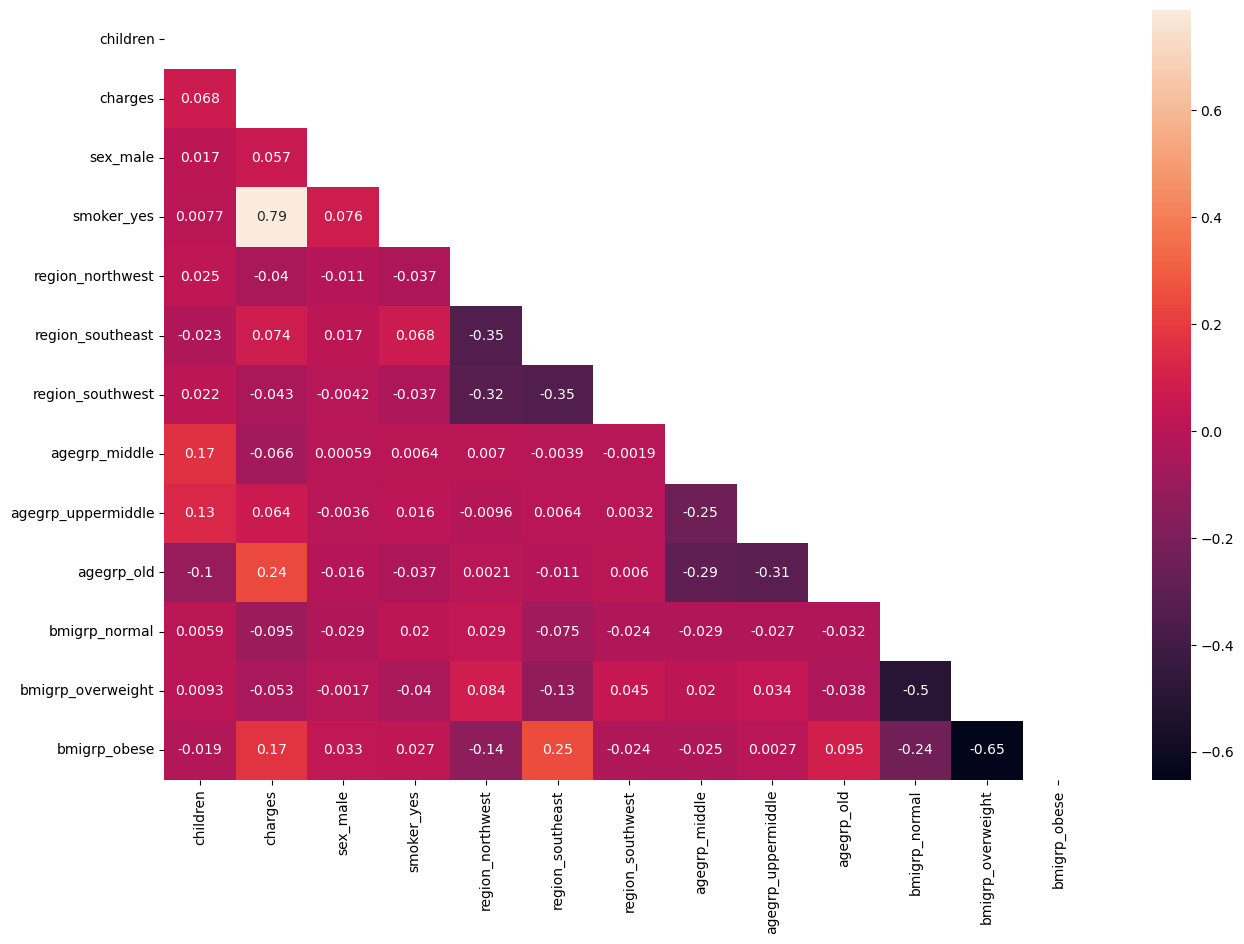

In [43]:
plt.figure(figsize=(15,10))
hide_cells = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), annot = True, mask = hide_cells)
plt.show()

From the heatmeap, we can observe that there is correlation between only independent variable with dependent variable.  No two indipendent variables are correlation. So, there is no need to check multi-collinearity.

## Checking for multi-collinearity

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            1338 non-null   int64  
 1   charges             1338 non-null   float64
 2   sex_male            1338 non-null   uint8  
 3   smoker_yes          1338 non-null   uint8  
 4   region_northwest    1338 non-null   uint8  
 5   region_southeast    1338 non-null   uint8  
 6   region_southwest    1338 non-null   uint8  
 7   agegrp_middle       1338 non-null   uint8  
 8   agegrp_uppermiddle  1338 non-null   uint8  
 9   agegrp_old          1338 non-null   uint8  
 10  bmigrp_normal       1338 non-null   uint8  
 11  bmigrp_overweight   1338 non-null   uint8  
 12  bmigrp_obese        1338 non-null   uint8  
dtypes: float64(1), int64(1), uint8(11)
memory usage: 35.4 KB


In [45]:
df_numeric_features = df.drop('charges', axis=1)
df_numeric_features.head()

,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,agegrp_middle,agegrp_uppermiddle,agegrp_old,bmigrp_normal,bmigrp_overweight,bmigrp_obese
0,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,0,0,0,0,0,1,0
2,3,1,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0


In [46]:
df_numeric_features.shape

(1338, 12)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features.values, i) for i in range(df_numeric_features.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features.columns

In [48]:
vif

,VIF_Factor,Features
0,1.919471,children
1,1.994610,sex_male
2,1.265862,smoker_yes
3,1.922923,region_northwest
4,2.209725,region_southeast
5,1.960664,region_southwest
6,1.599049,agegrp_middle
7,1.672336,agegrp_uppermiddle
8,1.798539,agegrp_old
9,1.794239,bmigrp_normal


From the above VIF values, none of them is more than 10.  So, there is no multi-colinearity.

# Building the model

## Split the data into train and test set.

In [49]:
#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [50]:
X = df.drop('charges', axis=1)
y = df['charges']

In [51]:
## Adding the intercept column using sm.add_constant function
X = sm.add_constant(X)
X.head()

,const,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,agegrp_middle,agegrp_uppermiddle,agegrp_old,bmigrp_normal,bmigrp_overweight,bmigrp_obese
0,1.0,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,1,0,0,1,0,0,0,0,0,1,0
2,1.0,3,1,0,0,1,0,0,0,0,0,1,0
3,1.0,0,1,0,1,0,0,1,0,0,1,0,0
4,1.0,0,1,0,1,0,0,1,0,0,0,1,0


In [52]:
## Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 1)

In [53]:
X_train.shape, y_train.shape

((1070, 13), (1070,))

In [54]:
X_test.shape, y_test.shape

((268, 13), (268,))

In [55]:
lr_model = sm.OLS(y_train, X_train).fit()  ## Training the model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     249.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.06e-298
Time:                        17:12:44   Log-Likelihood:                -10856.
No. Observations:                1070   AIC:                         2.174e+04
Df Residuals:                    1057   BIC:                         2.180e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1203.6012   1184

In [56]:
y_pred = lr_model.predict(X_test)  ## Predicting the target for  test data set

In [57]:
error = rmse(y_test, y_pred)

In [58]:
error

6066.061808228514

In [59]:
y_test.mean()

13431.164573059707

In [60]:
y_pred.mean()

13597.342044675335

### Model Observation

The Accuracy is **73.3%** and the standard Error is close to **5896**.  The reason for low accuracy or high error may be due to there is a skewness in the target variable, which were not treated before building the model.


### Normalizing the target variable

Let us use log normal to normalize the target variable and build the model again.

In [61]:
df['log_charges'] = np.log(df['charges'])

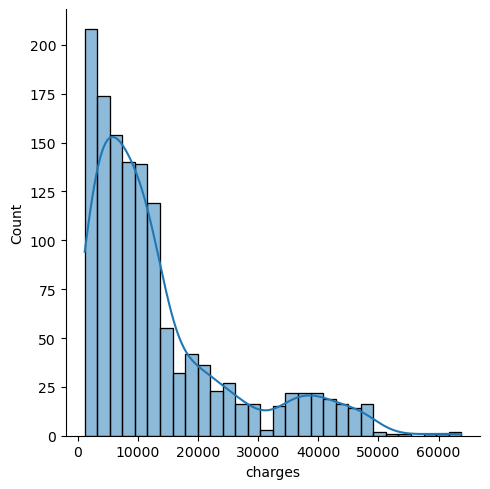

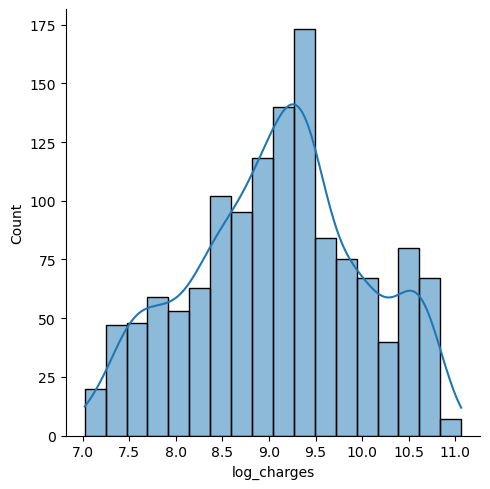

In [62]:
## Let us visualize the target column with normalized data
sns.displot(x='charges', kde=True, data=df)
sns.displot(x='log_charges', kde=True, data = df)
plt.show()

### Building the model with normalized target variable

In [63]:
## adding the intercept with original data frame
df = sm.add_constant(df)
df.shape

(1338, 15)

In [64]:
X = df.drop(['charges','log_charges'], axis=1)
y= df[['charges','log_charges']]

In [65]:
X.shape, y.shape

((1338, 13), (1338, 2))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y['log_charges'], test_size = 0.2, random_state = 1)

In [67]:
## Building the model
lr_model1 = sm.OLS(y_train, X_train).fit()
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.82e-299
Time:                        17:12:44   Log-Likelihood:                -700.76
No. Observations:                1070   AIC:                             1428.
Df Residuals:                    1057   BIC:                             1492.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.0423      0

In [68]:
y_pred1 = lr_model1.predict(X_test)  ## Predicting the target for test data

In [69]:
y_pred1[:5]

559     8.202694
1087    9.260022
1020    9.297963
460     9.283068
802     8.048559
dtype: float64

In [70]:
y_pred1_actual = np.exp(y_pred1)  ## Inverse logrithm to get the actual predicted value

In [71]:
y_pred1_actual[:5]

559      3650.771987
1087    10509.360161
1020    10915.762013
460     10754.375940
802      3129.281020
dtype: float64

In [72]:
y_test_actual = np.exp(y_test)

In [73]:
y_test_actual[:5]

559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: log_charges, dtype: float64

In [74]:
rmse(y_pred1_actual, y_test_actual)

8247.615424971144

In [75]:
y_test_actual.mean(), y_pred1_actual.mean()

(13431.164573059707, 13295.593134439097)

In [76]:
print(list(zip(y_test_actual[:5], y_pred1_actual[:5])))

[(1646.4297000000004, 3650.771986933505), (11353.227599999993, 10509.360161090646), (8798.592999999999, 10915.762013237205), (10381.478699999998, 10754.375939742784), (2103.08, 3129.281020442189)]


## Checking the training error

In [77]:
y_tr_pred = lr_model1.predict(X_train)

In [78]:
y_tr_pred_actual = np.exp(y_tr_pred)
y_tr_actual = np.exp(y_train)

In [79]:
rmse(y_tr_pred_actual, y_tr_actual)

8287.455374005385

In [80]:
X.head()

,const,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,agegrp_middle,agegrp_uppermiddle,agegrp_old,bmigrp_normal,bmigrp_overweight,bmigrp_obese
0,1.0,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,1,0,0,1,0,0,0,0,0,1,0
2,1.0,3,1,0,0,1,0,0,0,0,0,1,0
3,1.0,0,1,0,1,0,0,1,0,0,1,0,0
4,1.0,0,1,0,1,0,0,1,0,0,0,1,0


## Let us build the model using Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
lr_pred = lr.predict(X_test)

In [85]:
lr_pred_actual = np.exp(lr_pred)

In [86]:
rmse(y_test_actual, lr_pred_actual)

8247.615424971542

## Checking with RandomForestRegressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf = RandomForestRegressor()

In [89]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
rf_pred = rf.predict(X_test)

In [91]:
rf_pred_actual = np.exp(rf_pred)

In [92]:
rmse(rf_pred_actual, y_test_actual)

5676.521121743531

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test_actual, rf_pred_actual)

0.7841455386997938

## Building the model with original data without any feature engineering

In [127]:
df_orig.shape

(1199, 7)

In [103]:
df_orig.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [128]:
df_dummy = pd.get_dummies(df_orig, drop_first = True)

In [129]:
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [130]:
df_dummy = sm.add_constant(df_dummy)

In [131]:
X = df_dummy.drop('charges', axis=1)
y = df_dummy['charges']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [133]:
lr_orig = sm.OLS(y_train, X_train).fit()

In [134]:
orig_pred = lr_orig.predict(X_test)

In [135]:
lr_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          5.14e-192
Time:                        17:34:07   Log-Likelihood:                -9398.3
No. Observations:                 959   AIC:                         1.881e+04
Df Residuals:                     950   BIC:                         1.886e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3213.3767    857.395     -3.748      0.000   -4895.984   -1530.769
age                242.1014     10.268     23.578      0.000     221.950     262.252
bmi                 76.4354     25.126      3.042      0.002      27.127     125.744
children           357.7128    116.508      3.070      0.002     129.069     586.356
sex_male          -453.9422    284.242     -1.597      0.111   -1011.758     103.873
smoker_yes        1.512e+04    474.581     31.861      0.000    1.42e+04    1.61e+04
region_northwest   -85.2513    400.858     -0.213      0.832    -871.921     701.418
region_southeast  -953.5905    413.834     -2.304      0.021   -1765.726    -141.455
region_southwest -1361.1555    411.044     -3.311      0.001   -2167.815    -554.495
==============================================================================
Omnibus:                      608.614   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4311.121
Skew:                           3.020   Prob(JB):                         0.00
Kurtosis:                      11.451   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
rmse(y_test, orig_pred)

5257.93178588305

In [115]:
df_orig.charges.min(),df_orig.charges.max()

(1121.8739, 63770.42801)

In [116]:
df_orig.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [119]:
per_75, per_25 = df_orig.charges.quantile([.75,.25])

In [120]:
iqr = per_75 - per_25

In [121]:
up_limit = 1.5* iqr + per_75

In [122]:
up_limit

34489.350562499996

In [124]:
df_orig[df_orig.charges > up_limit].count()

age         139
sex         139
bmi         139
children    139
smoker      139
region      139
charges     139
dtype: int64

In [125]:
df_orig = df_orig[df_orig.charges <= up_limit]

In [126]:
df_orig.shape

(1199, 7)